In [1]:
#关于文档的一个数据分类
import pandas as pd
import seaborn as sns  #用于绘制热图的工具包
from scipy.cluster import hierarchy  #用于进行层次聚类，话层次聚类图的工具包
from scipy import cluster   
import matplotlib.pyplot as plt
from sklearn import decomposition as skldec #用于主成分分析降维的包
import numpy as np
#import csv
import math
from pandas import Series,DataFrame
from matplotlib.ticker import  MultipleLocator
import pylab as pl   #画图用
from sklearn import svm
from sklearn import linear_model

In [2]:
data =pd.read_excel('E:/vcdata/data/ALL_Intersection.xlsx')
dataClass = pd.read_excel('E:/vcdata/data/CijClass(2000-2017).xlsx')

In [3]:
###得到每一个分类里的城市
def get_city(data,classname):
    clsM=sorted(data[classname].drop_duplicates().values)###得到的分类数作为新列写进去
    DATAM=[]###按照城市对数据进行分组
    city=[]###每一组里面的每一列的均值
    for liM in clsM:
        datM=data[data[classname].isin([liM])]
        city.append(datM['city'].values)###得到每一类的城市
    return(city)

def jaccard_sim(a, b):###结果为a和b的交集除以a和b的并集
    unions = len(set(a).union(set(b)))
    intersections = len(set(a).intersection(set(b)))
    return intersections / unions

###得到各类之间的相关性
def getCIJ(City1,City2):
    CIJ = [] ###各类之间的相关性
    for i in range(len(City1)):
        cij = []###相关性
        for j in range(len(City2)):
            cij.append(jaccard_sim(City1[i],City2[j]))
        CIJ.append(cij)
    return(CIJ)

In [4]:
city13 = get_city(dataClass,'clusterA3') ###得到投资金额不同类的城市
city23 = get_city(dataClass,'clusterT3') ###得到投资金额不同类的城市
city33 = get_city(dataClass,'clusterG3') ###得到投资金额不同类的城市

City13 = [list(c) for c in city13]
City23 = [list(c) for c in city23]
City33 = [list(c) for c in city33]

cMT3 = pd.DataFrame(getCIJ(City13,City23))###得到相关性矩阵4*4
cMG3 = pd.DataFrame(getCIJ(City13,City33))
cTG3 = pd.DataFrame(getCIJ(City23,City33))
#####调整y轴的位置，将行逆置#########
font2 = {'family' : 'Arial',
    'weight' : 'normal',
    'size' : 22,
    }###设置横纵坐标的字体格式
### amount & times
cMT03 = pd.DataFrame(columns=['I','II','III'] )
cMT03.loc['III']=cMT3.iloc[2:3,:].values[0]
cMT03.loc['II']=cMT3.iloc[1:2,:].values[0]
cMT03.loc['I']=cMT3.iloc[0:1,:].values[0]

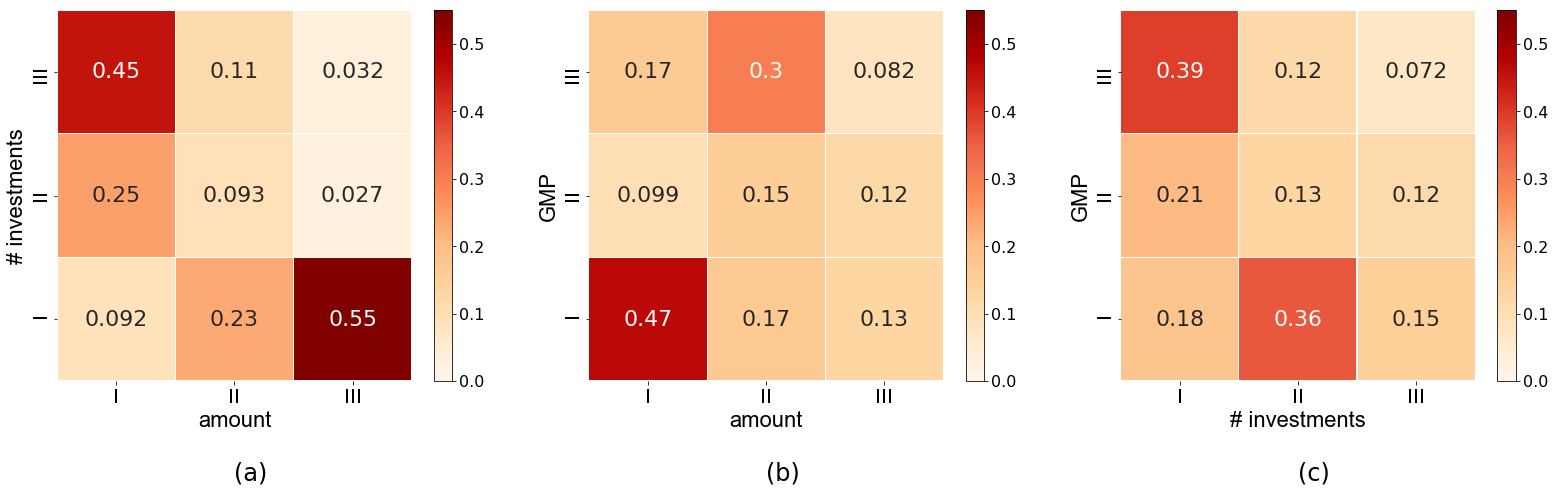

In [21]:
###在热图上画出来来先惯性矩阵
fig=plt.figure(figsize=(27,15))

ax1 = fig.add_subplot(231)
cmap = plt.cm.get_cmap('OrRd')
plt.tick_params(labelsize=20) #刻度字体大小13
h1=sns.heatmap(cMT03, linewidths = 0.05, ax = ax1, vmax=0.55, vmin=0, cmap=cmap,annot=True,annot_kws={'size':22,'weight':'normal'},cbar =False)
cb1=h1.figure.colorbar(h1.collections[0]) #显示colorbar
# cb3.ax.set_ticks([-1,-0.75,-0.5,-0.25,0, 0.25, 0.5,0.75, 1])
cb1.ax.tick_params(labelsize=16)  #设置色标刻度字体大小
ax1.set_xlabel('amount',font2)
ax1.set_ylabel('# investments',font2)
# plt.savefig('C:\\Users\\lu\\Desktop\\标度律\\6_jagardAT.png')#保存图片
# plt.text(0,-0.2,'(a)',fontsize=22)
plt.text(1.5,3.8,'(a)',fontsize=24)
### amount & GDP
cMG03 = pd.DataFrame(columns=['I','II','III'] )
cMG03.loc['III']=cMG3.iloc[2:3,:].values[0]
cMG03.loc['II']=cMG3.iloc[1:2,:].values[0]
cMG03.loc['I']=cMG3.iloc[0:1,:].values[0]
###在热图上画出来来先惯性矩阵
ax2=fig.add_subplot(232)
plt.tick_params(labelsize=20) #刻度字体大小13
cmap = plt.cm.get_cmap('OrRd')
h2=sns.heatmap(cMG03, linewidths = 0.05, ax = ax2, vmax=0.55, vmin=0, cmap=cmap ,xticklabels=True, yticklabels=True,cbar =False,annot=True,annot_kws={'size':22,'weight':'normal'})
cb2=h2.figure.colorbar(h2.collections[0]) #显示colorbar
# cb3.ax.set_ticks([-1,-0.75,-0.5,-0.25,0, 0.25, 0.5,0.75, 1])
cb2.ax.tick_params(labelsize=16)  #设置色标刻度字体大小
ax2.set_xlabel('amount',font2)
ax2.set_ylabel('GMP',font2)
plt.text(1.5,3.8,'(b)',fontsize=24)
### times & GMP
cTG03 = pd.DataFrame(columns=['I','II','III'] )
cTG03.loc['III']=cTG3.iloc[2:3,:].values[0]
cTG03.loc['II']=cTG3.iloc[1:2,:].values[0]
cTG03.loc['I']=cTG3.iloc[0:1,:].values[0]
# plt.text(0,-0.2,'(b)',fontsize=22)
###在热图上画出来来先惯性矩阵
ax3=fig.add_subplot(233)
plt.tick_params(labelsize=20) #刻度字体大小13
cmap = plt.cm.get_cmap('OrRd')
h3 = sns.heatmap(cTG03, linewidths = 0.05, ax = ax3, vmax=0.55, vmin=0, cmap=cmap,annot=True,annot_kws={'size':22,'weight':'normal'},cbar =False)
cb3=h3.figure.colorbar(h3.collections[0]) #显示colorbar
# cb3.ax.set_ticks([-1,-0.75,-0.5,-0.25,0, 0.25, 0.5,0.75, 1])
cb3.ax.tick_params(labelsize=16)  #设置色标刻度字体大小
ax3.set_xlabel('# investments',font2)
ax3.set_ylabel('GMP',font2)
# plt.savefig('E:/vcdata/pic/picSC/Fig7_ajagard3.pdf', bbox_inches='tight')

# plt.savefig('E:/0论文/SCA/Fig4_a.pdf', bbox_inches='tight')
plt.text(1.5,3.8,'(c)',fontsize=24)
plt.savefig('E:/0论文/2picture/3_7.png',dpi=500, bbox_inches='tight')

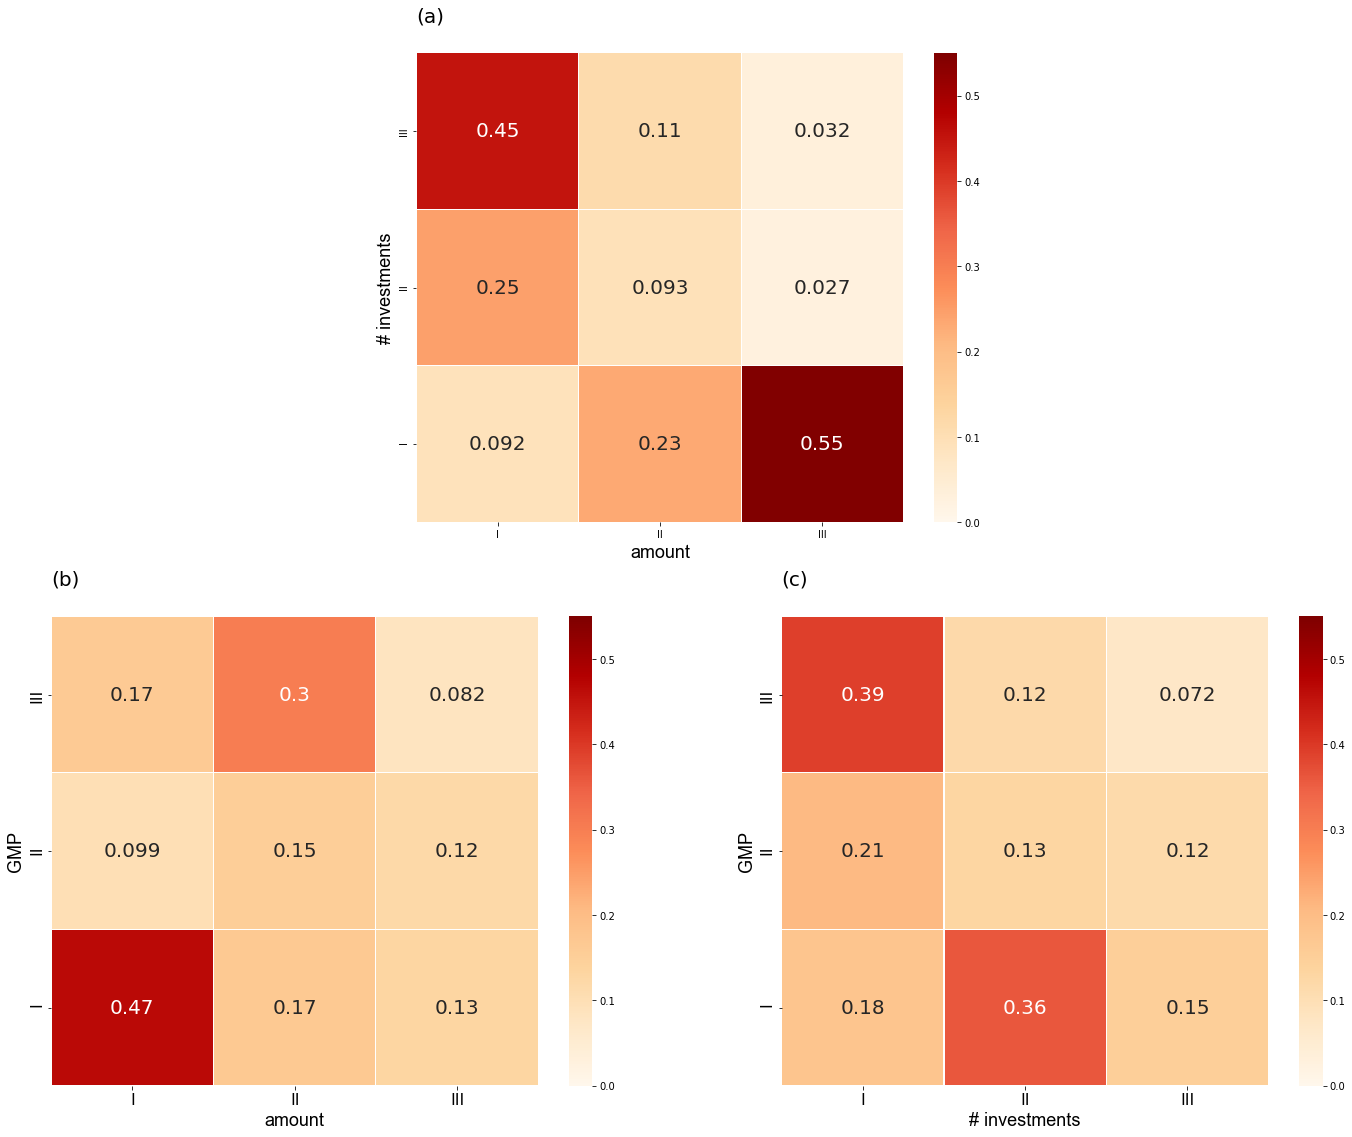

In [9]:
###在热图上画出来来先惯性矩阵
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(24,8))
gs = gridspec.GridSpec(2, 4)
gs.update(wspace=0.5)
ax1 = plt.subplot(gs[0, 1:3])
cmap = plt.cm.get_cmap('OrRd')

sns.heatmap(cMT03, linewidths = 0.05, ax = ax1, vmax=0.55, vmin=0, cmap=cmap,annot=True,annot_kws={'size':20,'weight':'normal'})
ax1.set_xlabel('amount',font2)
ax1.set_ylabel('# investments',font2)
# plt.savefig('C:\\Users\\lu\\Desktop\\标度律\\6_jagardAT.png')#保存图片
plt.text(0,-0.2,'(a)',fontsize=20)
### amount & GDP
cMG03 = pd.DataFrame(columns=['I','II','III'] )
cMG03.loc['III']=cMG3.iloc[2:3,:].values[0]
cMG03.loc['II']=cMG3.iloc[1:2,:].values[0]
cMG03.loc['I']=cMG3.iloc[0:1,:].values[0]
###在热图上画出来来先惯性矩阵
ax2 = plt.subplot(gs[1, :2], )
plt.tick_params(labelsize=16) #刻度字体大小13
cmap = plt.cm.get_cmap('OrRd')
sns.heatmap(cMG03, linewidths = 0.05, ax = ax2, vmax=0.55, vmin=0, cmap=cmap ,xticklabels=True, yticklabels=True,annot=True,annot_kws={'size':20,'weight':'normal'})
ax2.set_xlabel('amount',font2)
ax2.set_ylabel('GMP',font2)
plt.text(0,-0.2,'(b)',fontsize=20)
### times & GMP
cTG03 = pd.DataFrame(columns=['I','II','III'] )
cTG03.loc['III']=cTG3.iloc[2:3,:].values[0]
cTG03.loc['II']=cTG3.iloc[1:2,:].values[0]
cTG03.loc['I']=cTG3.iloc[0:1,:].values[0]

###在热图上画出来来先惯性矩阵
ax3 = plt.subplot(gs[1, 2:])
plt.tick_params(labelsize=16) #刻度字体大小13
cmap = plt.cm.get_cmap('OrRd')
sns.heatmap(cTG03, linewidths = 0.05, ax = ax3, vmax=0.55, vmin=0, cmap=cmap,annot=True,annot_kws={'size':20,'weight':'normal'})
ax3.set_xlabel('# investments',font2)
ax3.set_ylabel('GMP',font2)
plt.text(0,-0.2,'(c)',fontsize=20)

plt.savefig('E:/0论文/0picture/4_7.png',dpi=500, bbox_inches='tight')